# Titanic Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import collections
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set()

In [3]:
# import dataset

In [4]:
df = pd.read_csv(r'titanic.csv') 

In [5]:
#top 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#last 5 rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
# row- column
df.shape

(891, 12)

In [11]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
#overall stats
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

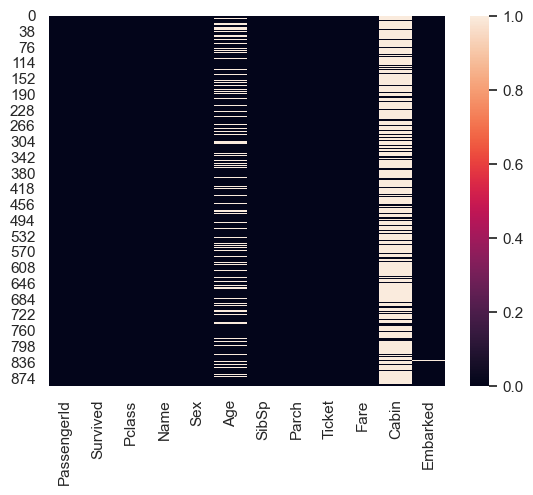

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.drop('Cabin', axis=1,inplace = True)

In [16]:
# replacing embarked cols null values with most used values

In [17]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

'S' is used most times

In [18]:
df['Embarked'].fillna('S',inplace=True)

In [20]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Exploratory Data Analysis

In [32]:
# Dead-Alive distribution

In [28]:
df1 = df['Survived'].value_counts()
df1

Survived
0    549
1    342
Name: count, dtype: int64

0-->  Deceased

1--> Survived

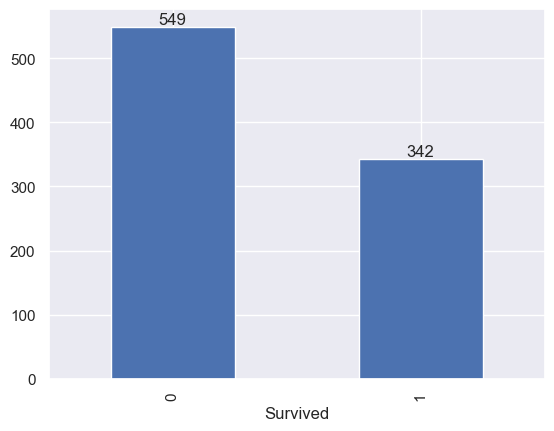

In [145]:
ax = df1.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

In [33]:
# Gender-distribution

In [35]:
df2 = df['Sex'].value_counts()
df2

Sex
male      577
female    314
Name: count, dtype: int64

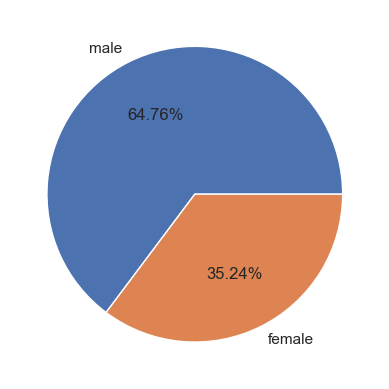

In [38]:
df2.plot(kind = 'pie', autopct='%1.2f%%')
plt.ylabel(None)
plt.show()

In [39]:
#Age distribution

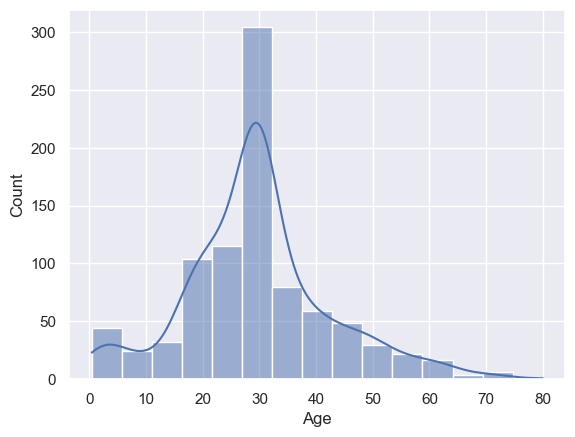

In [64]:
sns.histplot(df['Age'], kde =True, bins = 15)
plt.show()

In [75]:
# Avg and Max ticket price

In [67]:
df['Fare'].mean().round(2)

32.2

In [72]:
df['Fare'].max()

512.3292

In [87]:
# Mortality dist gender wise

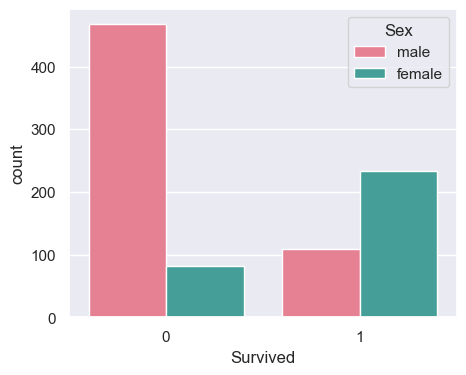

In [94]:
plt.figure(figsize =(5,4))
sns.countplot(x = "Survived", data = df, hue = 'Sex', palette= 'husl')
plt.show()

In [92]:
# Mortality distribution Age wise

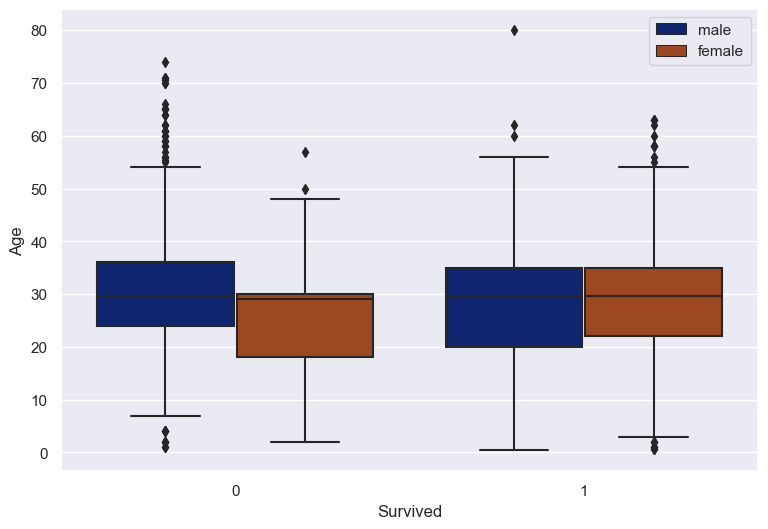

In [93]:
plt.figure(figsize = (9,6))
sns.boxplot(data=df, x="Survived", y="Age",hue = 'Sex', palette = 'dark')
plt.legend(loc = 1)
plt.show()

In [95]:
# Passenger class dist

In [102]:
df4 = df['Pclass'].value_counts()
df4

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

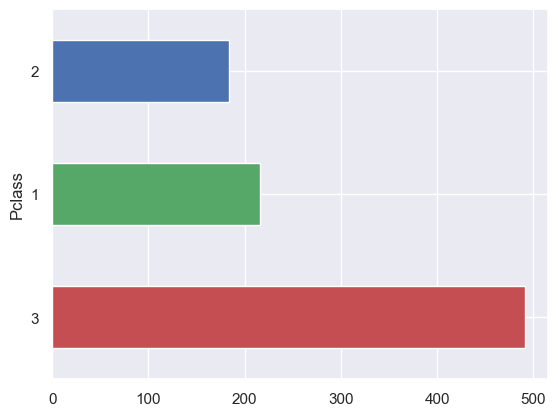

In [107]:
# Define custom colors
colors = ['r', 'g', 'b']
df4.plot(kind='barh', color=colors)
plt.show()

In [108]:
# Which class better chance of survival ?

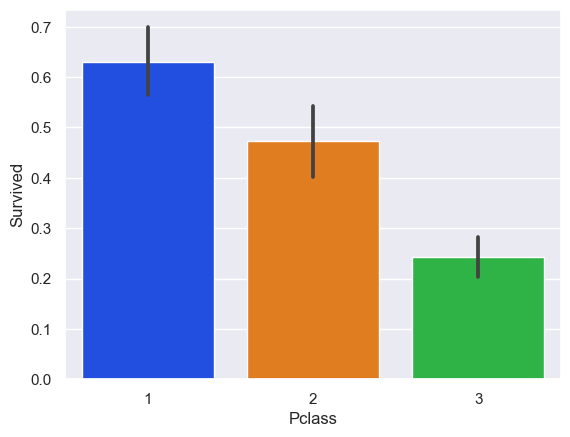

In [115]:
sns.barplot(x = 'Pclass', y = 'Survived', data =df, palette = 'bright')
plt.show()

### Feature Engineering

In [117]:
df['Family Size']= df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [147]:
df['Fare Per Person'] = df['Fare']/ (df['Family Size'] + 1)
# The person himself is counted alongside so +1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,Fare Per Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,8.05000


In [154]:
# Heatmap of Average Fare by Passenger Class and Gender

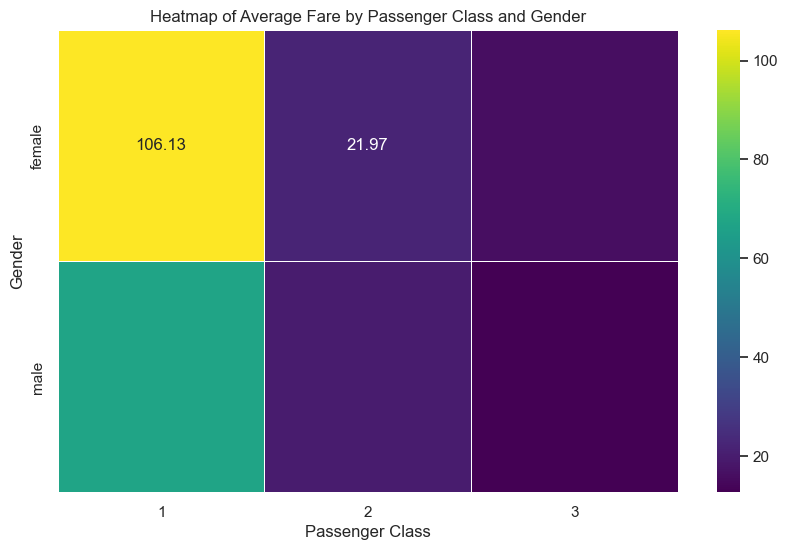

In [153]:
# Heatmap of average fare
pivot_table = df.pivot_table(index='Sex', columns='Pclass', values='Fare', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.2f', linewidths=0.5)
plt.xlabel('Passenger Class')
plt.ylabel('Gender')
plt.title('Heatmap of Average Fare by Passenger Class and Gender')
plt.show()
